In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "../../../Risultati/Air_Quality/data_imputation_regression.csv"
df_f = pd.read_csv(path)
df_f.head()
df_f.reset_index(drop=True)
df_f['percentage'] = 100 - df_f['percentage']
df_f

,percentage,outlier,imputation,r2
0,100,none,none,0.783927
1,100,none,none,0.783063
2,100,none,none,0.784079
3,90,none,none,0.774911
4,90,none,drop,0.784075
...,...,...,...,...
198,50,none,none,0.757242
199,50,none,drop,0.812408
200,50,none,LOCF,0.779109
201,50,none,mean,0.751600


In [3]:
df_f_grouped = df_f.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_f_grouped)

                       percentage        r2
outlier imputation                         
none    drop            70.000000  0.805294
        LOCF            70.000000  0.781914
        interpolation   70.000000  0.780781
        none            72.093023  0.769265
        mean            70.000000  0.763854


In [4]:
top_performance = df_f[df_f['percentage']==100]['r2'].mean()
top_performance

0.7836899009994855

In [5]:
df_f['percent_diff'] = (((df_f['r2'] - top_performance) / top_performance) * 100).round(2)
df_f

,percentage,outlier,imputation,r2,percent_diff
0,100,none,none,0.783927,0.03
1,100,none,none,0.783063,-0.08
2,100,none,none,0.784079,0.05
3,90,none,none,0.774911,-1.12
4,90,none,drop,0.784075,0.05
...,...,...,...,...,...
198,50,none,none,0.757242,-3.37
199,50,none,drop,0.812408,3.66
200,50,none,LOCF,0.779109,-0.58
201,50,none,mean,0.751600,-4.09


In [6]:
tabella = df_f.groupby(['outlier','imputation','percentage']).mean()
tabella['r2'] = tabella['r2'].round(4)
tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella.sort_values(by=['outlier','imputation'],ascending=False).to_csv("1_r.csv")
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['outlier','imputation'],columns='percentage',values='percent_diff').reset_index().sort_values(by=[100,90,80,70],ascending=False)
tabella.to_csv("1_r_n.csv")

In [7]:
df_f_none = df_f[(df_f['imputation'] == 'none')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_none

,percentage,r2,percent_diff
0,50,0.759566,-3.07875
1,60,0.761897,-2.78000
2,70,0.767682,-2.04250
3,80,0.773037,-1.36000
4,90,0.778732,-0.63125
5,100,0.783690,0.00000


In [8]:
df_f_drop = df_f[(df_f['imputation'] == 'drop')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_drop

,percentage,r2,percent_diff
0,50,0.810871,3.46875
1,60,0.810189,3.38125
2,70,0.808479,3.16250
3,80,0.803773,2.56375
4,90,0.793161,1.21000


In [9]:
df_f_locf = df_f[(df_f['imputation'] == 'LOCF')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_locf

,percentage,r2,percent_diff
0,50,0.779894,-0.48375
1,60,0.782364,-0.16750
2,70,0.781177,-0.32125
3,80,0.782279,-0.18000
4,90,0.783855,0.02125


In [10]:
df_f_mean = df_f[(df_f['imputation'] == 'mean')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_mean

,percentage,r2,percent_diff
0,50,0.753797,-3.81375
1,60,0.758073,-3.26875
2,70,0.761845,-2.78625
3,80,0.768665,-1.91875
4,90,0.776890,-0.86750


In [11]:
df_f_int = df_f[(df_f['imputation'] == 'interpolation')].groupby(['percentage']).mean(numeric_only=True).reset_index()
df_f_int

,percentage,r2,percent_diff
0,50,0.778374,-0.67750
1,60,0.779940,-0.47750
2,70,0.781130,-0.32625
3,80,0.781643,-0.26125
4,90,0.782818,-0.11125


[]

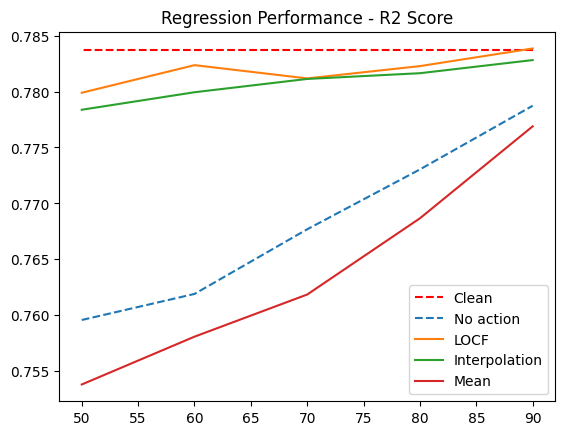

In [12]:
perc = [90,80,70,60,50]
#plt.ylim(0.7,0.8)
plt.plot(perc, [df_f_none['r2'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_f_none['percentage'].iloc[:-1],df_f_none['r2'].iloc[:-1], '--', label='No action')
#plt.plot(df_f_drop['percentage'],df_f_drop['r2'], label='drop')
plt.plot(df_f_locf['percentage'],df_f_locf['r2'], label='LOCF')
plt.plot(df_f_int['percentage'],df_f_int['r2'], label='Interpolation')
plt.plot(df_f_mean['percentage'],df_f_mean['r2'], label='Mean')
plt.title("Regression Performance - R2 Score")
plt.legend()
plt.plot()

[]

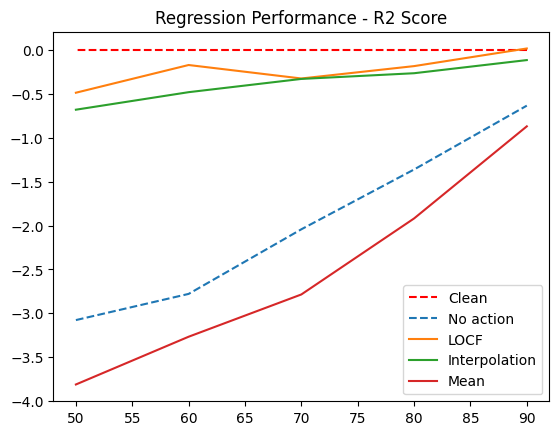

In [13]:
perc = [90,80,70,60,50]
#plt.ylim(0.7,0.8)
plt.plot(perc, [df_f_none['percent_diff'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_f_none['percentage'].iloc[:-1],df_f_none['percent_diff'].iloc[:-1], '--', label='No action')
#plt.plot(df_f_drop['percentage'],df_f_drop['percent_diff'], label='drop')
plt.plot(df_f_locf['percentage'],df_f_locf['percent_diff'], label='LOCF')
plt.plot(df_f_int['percentage'],df_f_int['percent_diff'], label='Interpolation')
plt.plot(df_f_mean['percentage'],df_f_mean['percent_diff'], label='Mean')
plt.title("Regression Performance - R2 Score")
plt.legend()
plt.plot()